# Comparing Depth to Water and Number of Zero Flow Qualitatively

The purpose of this script is to compare basins with increased zero flow with declining groundwater.  We will categorize basins on whether or not DTW or NZF has changed between decades, and compare

In [1]:
# Packages and paths

import os
import numpy as np
import pandas as pd
#import earthpy as et
import scipy.stats as sp
import geopandas as gp
import matplotlib.pyplot as plt

# Local paths
# inputpath = '../../Data/Input/RawData'
inputpath = '../../Data/Input'
outputpath = '../../Data/Output/Local'

# Function to calculate slope using linear regression
def calculate_slope(y):
    x = np.arange(len(y))
    slope, _ = np.polyfit(x, y, 1)
    return slope

In [3]:
# Define a function to label changes
def categorize_change(change, tolerance=1):
    if pd.isna(change):
        return "no data"
    elif change > tolerance:
        return "increased"
    elif change < -tolerance:
        return "decreased"
    else:
        return "no change"

# Apply to each column
#qualitative_change = dtw_change.applymap(categorize_change)


In [4]:
filename = outputpath+f'HUC8s_medianDTWChange_2000mfromStreams.csv'
dtw_change = pd.read_csv(filename, index_col='huc8')
del dtw_change['Unnamed: 0']
dtw_change

,80s vs 90s,90s vs 00s,00s vs 10s,10s vs 20s
huc8,,,,
15010001,0.000000,NaN,NaN,NaN
15010002,NaN,NaN,NaN,NaN
15010003,4.572000,3.657600,2.133600,NaN
15010004,2.743200,1.219200,11.277600,-13.380720
15010005,8.930640,27.035760,-0.335280,-0.822960
...,...,...,...,...
15080101,NaN,NaN,NaN,NaN
15080102,0.512064,11.137392,3.755136,-17.995392
15080200,1.444752,0.441960,3.489960,-21.396960


In [5]:
filename = outputpath+f'/HUC12s_MeanDecadalZeroFlow.csv'
nzf_decade = pd.read_csv(filename, index_col='huc12')
del nzf_decade['Unnamed: 0']
nzf_decade

,1980,1990,2000,2010,2020
huc12,,,,,
150100010508,0.000000,0.000000,0.000000,NaN,NaN
150100010607,NaN,0.000000,NaN,NaN,NaN
150100010608,NaN,0.000000,NaN,NaN,NaN
150100020101,NaN,NaN,NaN,0.000000,0.0
150100020405,0.000000,0.000000,NaN,NaN,NaN
150100020908,NaN,0.000000,0.000000,0.000000,0.0
150100020909,NaN,0.000000,0.000000,0.000000,0.0
150100100208,1.000000,0.000000,0.000000,0.000000,0.0
150100100602,1.000000,0.000000,0.000000,0.000000,0.0


In [6]:
# Rename the columns for clarity (optional)
nzf_decade.columns = [f"{decade}s" for decade in nzf_decade.columns]

# Calculate change between decades
nzf_change = pd.DataFrame(index=nzf_decade.index)
nzf_change["80s vs 90s"] = nzf_decade["1990s"] - nzf_decade["1980s"]
nzf_change["90s vs 00s"] = nzf_decade["2000s"] - nzf_decade["1990s"]
nzf_change["00s vs 10s"] = nzf_decade["2010s"] - nzf_decade["2000s"]
nzf_change["10s vs 20s"] = nzf_decade["2020s"] - nzf_decade["2010s"]

nzf_change

,80s vs 90s,90s vs 00s,00s vs 10s,10s vs 20s
huc12,,,,
150100010508,0.000000,0.000000,NaN,NaN
150100010607,NaN,NaN,NaN,NaN
150100010608,NaN,NaN,NaN,NaN
150100020101,NaN,NaN,NaN,0.0
150100020405,0.000000,NaN,NaN,NaN
150100020908,NaN,0.000000,0.000000,0.0
150100020909,NaN,0.000000,0.000000,0.0
150100100208,-1.000000,0.000000,0.000000,0.0
150100100602,-1.000000,0.000000,0.000000,0.0


In [7]:
nzf_change.to_csv(outputpath+f'/HUC12_meanNZFChange.csv')

In [8]:
nzf_qualchange = nzf_change.applymap(categorize_change)
nzf_qualchange

,80s vs 90s,90s vs 00s,00s vs 10s,10s vs 20s
huc12,,,,
150100010508,no change,no change,no data,no data
150100010607,no data,no data,no data,no data
150100010608,no data,no data,no data,no data
150100020101,no data,no data,no data,no change
150100020405,no change,no data,no data,no data
150100020908,no data,no change,no change,no change
150100020909,no data,no change,no change,no change
150100100208,no change,no change,no change,no change
150100100602,no change,no change,no change,no change


In [9]:
nzf_qualchange = nzf_qualchange.reset_index()
nzf_qualchange.to_csv(outputpath+f'/HUC12_NZFQualitativeChange.csv')

In [12]:
zero_flow_df = nzf_change.copy()
# Step 1: Convert HUC12 to HUC8
zero_flow_df['huc8'] = zero_flow_df.index.astype(str).str[:8]
zero_flow_df

,80s vs 90s,90s vs 00s,00s vs 10s,10s vs 20s,huc8
huc12,,,,,
150100010508,0.000000,0.000000,NaN,NaN,15010001
150100010607,NaN,NaN,NaN,NaN,15010001
150100010608,NaN,NaN,NaN,NaN,15010001
150100020101,NaN,NaN,NaN,0.0,15010002
150100020405,0.000000,NaN,NaN,NaN,15010002
150100020908,NaN,0.000000,0.000000,0.0,15010002
150100020909,NaN,0.000000,0.000000,0.0,15010002
150100100208,-1.000000,0.000000,0.000000,0.0,15010010
150100100602,-1.000000,0.000000,0.000000,0.0,15010010


In [13]:
# Step 2: Aggregate to HUC8
zero_flow_huc8 = zero_flow_df.groupby('huc8').mean()
zero_flow_huc8

,80s vs 90s,90s vs 00s,00s vs 10s,10s vs 20s
huc8,,,,
15010001,0.000000,0.000000,NaN,NaN
15010002,0.000000,0.000000,0.000000,0.000000
15010010,-1.000000,0.000000,0.000000,0.000000
15020001,NaN,NaN,205.333333,NaN
15020002,0.850000,96.400000,65.900000,-11.050000
15020008,NaN,NaN,28.338095,-16.800000
15020010,NaN,27.200000,-20.300000,4.700000
15020013,NaN,32.166667,6.100000,80.400000
15020014,NaN,25.142857,NaN,NaN


In [14]:
# Step 3: Filter DTW data to matching HUC8s
dtw_df = dtw_change.copy()
zero_flow_huc8 = zero_flow_huc8.dropna(how='all')
dtw_df = dtw_df.dropna(how='all')
zero_flow_huc8.index = zero_flow_huc8.index.astype('int64')
common_hucs = zero_flow_huc8.index.intersection(dtw_df.index)
zero_flow_huc8 = zero_flow_huc8.loc[common_hucs]
dtw_df_filtered = dtw_df.loc[common_hucs]

dtw_df_filtered

,80s vs 90s,90s vs 00s,00s vs 10s,10s vs 20s
huc8,,,,
15010001,0.000000,NaN,NaN,NaN
15010010,-0.777240,-1.844040,-13.837920,15.788640
15020001,-1.524000,2.133600,-0.030480,-0.548640
15020002,-10.363200,1.844040,6.385560,-8.534400
15020008,-4.724400,0.609600,5.486400,-4.267200
15020010,30.480000,-6.583680,-6.522720,-16.459200
15030104,-3.048000,0.000000,1.828800,0.609600
15030107,0.000000,0.612648,3.909060,-0.272796
15030204,-0.678180,1.203960,10.424160,11.948160


In [16]:
# Step 4: Classify by trend
def classify_trend(zero_flow_change, dtw_change):
    if zero_flow_change > 1 and dtw_change > 1:
        return "Increased Zero Flow & Increased DTW"
    elif zero_flow_change < -1 and dtw_change > 1:
        return "Decreased Zero Flow & Increased DTW"
    elif zero_flow_change > 1 and dtw_change < -1:
        return "Increased Zero Flow & Decreased DTW"
    elif zero_flow_change < -1 and dtw_change < -1:
        return "Decreased Zero Flow & Decreased DTW"
    
    elif (zero_flow_change > -1) and (zero_flow_change < 1) and dtw_change < -1:
        return "No change to Zero Flow & Decreased DTW"
    elif (zero_flow_change > -1) and (zero_flow_change < 1) and dtw_change > 1:
        return "No change to Zero Flow & Increased DTW"

    elif zero_flow_change < -1 and dtw_change > -1 and dtw_change < 1:
        return "Decreased Zero Flow & No change to DTW"
    elif zero_flow_change > 1 and dtw_change > -1 and dtw_change < 1:
        return "Increased Zero Flow & No change to DTW"
    else:
        return "No Change in Zero Flow or DTW"

# Choose a column/decade to compare (e.g., 1980s to 1990s)
decade_col = '80s vs 90s'

# Apply classification
classification = pd.DataFrame(index=common_hucs)
classification[decade_col] = [
    classify_trend(zf, dtw)
    for zf, dtw in zip(zero_flow_huc8[decade_col], dtw_df_filtered[decade_col])
]
classification

,80s vs 90s
huc8,
15010001,No Change in Zero Flow or DTW
15010010,No Change in Zero Flow or DTW
15020001,No Change in Zero Flow or DTW
15020002,No change to Zero Flow & Decreased DTW
15020008,No Change in Zero Flow or DTW
15020010,No Change in Zero Flow or DTW
15030104,Increased Zero Flow & Decreased DTW
15030107,No Change in Zero Flow or DTW
15030204,Decreased Zero Flow & No change to DTW


In [17]:
zero_flow_huc8.columns.to_list()

['80s vs 90s', '90s vs 00s', '00s vs 10s', '10s vs 20s']

In [18]:
classification = pd.DataFrame(index=common_hucs)
# Apply classification
for i in zero_flow_huc8.columns.to_list():
    classification[i] = [
        classify_trend(zf, dtw)
        for zf, dtw in zip(zero_flow_huc8[i], dtw_df_filtered[i])
    ]
classification

,80s vs 90s,90s vs 00s,00s vs 10s,10s vs 20s
huc8,,,,
15010001,No Change in Zero Flow or DTW,No Change in Zero Flow or DTW,No Change in Zero Flow or DTW,No Change in Zero Flow or DTW
15010010,No Change in Zero Flow or DTW,No change to Zero Flow & Decreased DTW,No change to Zero Flow & Decreased DTW,No change to Zero Flow & Increased DTW
15020001,No Change in Zero Flow or DTW,No Change in Zero Flow or DTW,Increased Zero Flow & No change to DTW,No Change in Zero Flow or DTW
15020002,No change to Zero Flow & Decreased DTW,Increased Zero Flow & Increased DTW,Increased Zero Flow & Increased DTW,Decreased Zero Flow & Decreased DTW
15020008,No Change in Zero Flow or DTW,No Change in Zero Flow or DTW,Increased Zero Flow & Increased DTW,Decreased Zero Flow & Decreased DTW
15020010,No Change in Zero Flow or DTW,Increased Zero Flow & Decreased DTW,Decreased Zero Flow & Decreased DTW,Increased Zero Flow & Decreased DTW
15030104,Increased Zero Flow & Decreased DTW,No Change in Zero Flow or DTW,No Change in Zero Flow or DTW,No Change in Zero Flow or DTW
15030107,No Change in Zero Flow or DTW,No Change in Zero Flow or DTW,No change to Zero Flow & Increased DTW,No Change in Zero Flow or DTW
15030204,Decreased Zero Flow & No change to DTW,Increased Zero Flow & Increased DTW,Increased Zero Flow & Increased DTW,Decreased Zero Flow & Increased DTW


In [19]:
classification = classification.reset_index()
classification.to_csv(outputpath+'/stream_dtw_classifciation_decades_tolerance1m.csv')

In [60]:
# Create a dictionary to hold matrices for each decade
matrix_dict = {}

# Loop over each decade column
for col in zero_flow_huc8.columns:
    # Create the 3x3 matrix as nested dictionaries
    matrix = {
        'increased': {'increased': [], 'no change': [], 'decreased': []},
        'no change': {'increased': [], 'no change': [], 'decreased': []},
        'decreased': {'increased': [], 'no change': [], 'decreased': []}
    }

    # Loop through each HUC8
    for huc in common_hucs:
        zf_val = zero_flow_huc8.loc[huc, col]
        dtw_val = dtw_df_filtered.loc[huc, col]
        
        zf_cat = categorize_change(zf_val)
        dtw_cat = categorize_change(dtw_val)

        if zf_cat != 'no data' and dtw_cat != 'no data':
            matrix[dtw_cat][zf_cat].append(huc)

    matrix_dict[col] = matrix


In [61]:
matrix

{'increased': {'increased': [15040005,
   15050100,
   15050202,
   15060105,
   15070201,
   15080301],
  'no change': [15010010, 15060103],
  'decreased': [15030204, 15070103]},
 'no change': {'increased': [], 'no change': [], 'decreased': []},
 'decreased': {'increased': [15020010, 15050304, 15060203],
  'no change': [15030107, 15060202],
  'decreased': [15020002, 15020008, 15050301, 15070102]}}

In [62]:
matrix_dict['00s vs 10s']

{'increased': {'increased': [15020002,
   15020008,
   15030204,
   15050202,
   15070102,
   15070103,
   15070201,
   15080301],
  'no change': [15030107, 15060202],
  'decreased': [15060105]},
 'no change': {'increased': [15020001],
  'no change': [],
  'decreased': [15040005]},
 'decreased': {'increased': [15050301, 15050304],
  'no change': [15010010, 15060103],
  'decreased': [15020010, 15050100, 15060203]}}

In [66]:
def matrix_to_df(matrix):
    return pd.DataFrame({
        zf_cat: {
            dtw_cat: len(matrix[dtw_cat][zf_cat])
            for dtw_cat in ['increased', 'no change', 'decreased']
        }
        for zf_cat in ['increased', 'no change', 'decreased']
    }).T  # transpose to have DTW on rows, ZF on columns


In [67]:
# Example: get summary DataFrame for one decade
summary_df = matrix_to_df(matrix_dict['10s vs 20s'])
print(summary_df)


           increased  no change  decreased
increased          6          0          3
no change          2          0          2
decreased          2          0          4


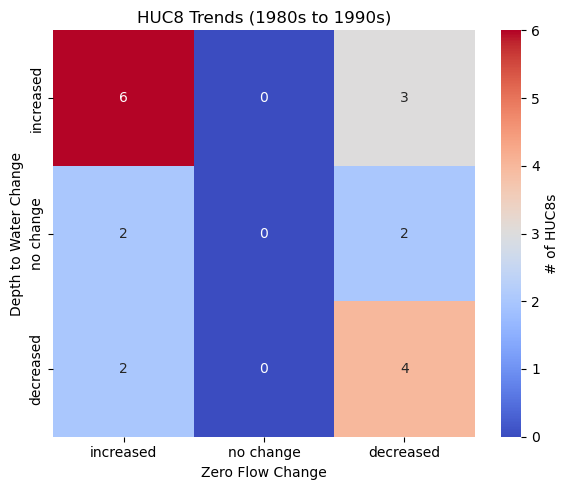

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(matrix_df, decade_label):
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix_df, annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': '# of HUC8s'})
    plt.title(f"HUC8 Trends ({decade_label})")
    plt.xlabel("Zero Flow Change")
    plt.ylabel("Depth to Water Change")
    plt.tight_layout()
    plt.show()

plot_heatmap(summary_df, '1980s to 1990s')


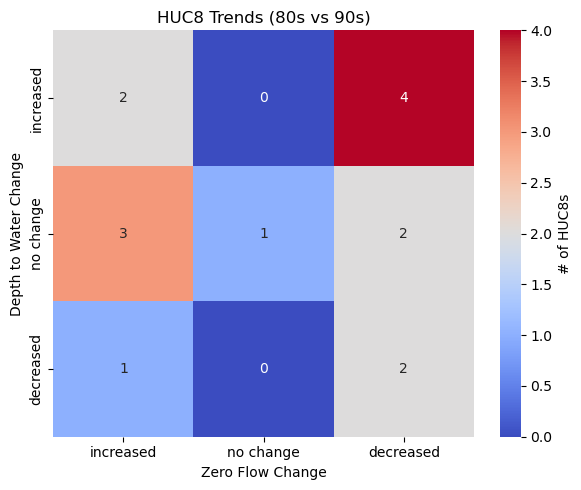

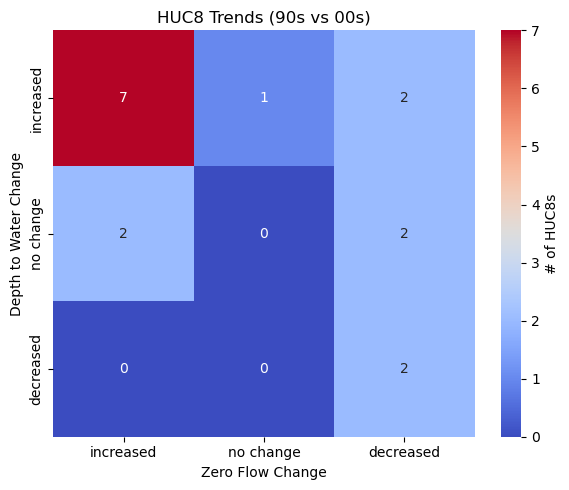

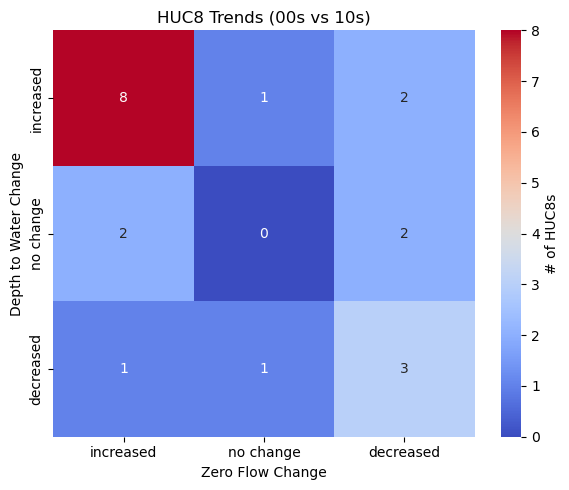

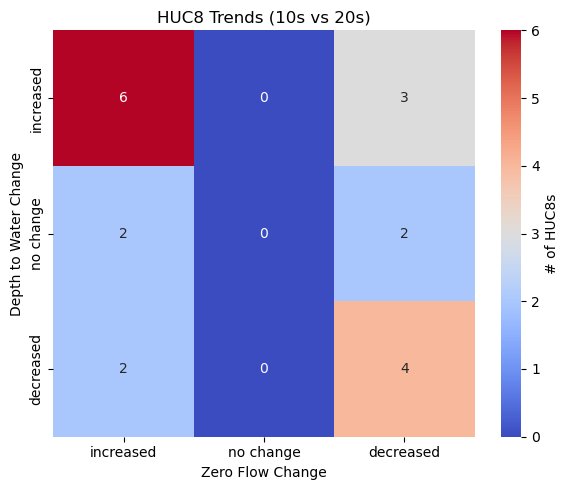

In [69]:
for decade in matrix_dict:
    summary = matrix_to_df(matrix_dict[decade])
    plot_heatmap(summary, decade)


In [70]:
def matrix_to_huc_df(matrix):
    return pd.DataFrame({
        zf_cat: {
            dtw_cat: matrix[dtw_cat][zf_cat]
            for dtw_cat in ['increased', 'no change', 'decreased']
        }
        for zf_cat in ['increased', 'no change', 'decreased']
    }).T  # transpose so DTW is rows


In [72]:
# For a single decade
huc_df = matrix_to_huc_df(matrix_dict['10s vs 20s'])

In [73]:
huc_df

,increased,no change,decreased
increased,"[15040005, 15050100, 15050202, 15060105, 15070...",[],"[15020010, 15050304, 15060203]"
no change,"[15010010, 15060103]",[],"[15030107, 15060202]"
decreased,"[15030204, 15070103]",[],"[15020002, 15020008, 15050301, 15070102]"
